#**PROBLEMA DE NEGOCIO**


---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---




In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados

#**2. Preprocesamiento de Datos**


---


In [2]:
df_banco = pd.read_csv("https://ceibe.eu/bootcamp/german_credit.csv")
df_banco.head(6)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,none,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes


In [3]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [4]:

def procesar_datos():
  # variables de ámbito global
  global df_banco, resultados

  # Muestra la cantidad de registros del fichero csv cargado
  print("Cantidad de registros:")
  print(df_banco.shape)
  print('--------------')

  # Muestra los registros duplicados antes de eliminarlos
  duplicados_antes = df_banco[df_banco.duplicated()]
  print("Registros duplicados ANTES de eliminar:")
  print(duplicados_antes.shape)
  print('--------------')

  # Mostrar cuántos valores nulos hay en cada columna
  valores_nulos_por_columna = df_banco.isnull().sum()
  print("Valores nulos por columna:\n", valores_nulos_por_columna)
  print("---------------")

procesar_datos()

Cantidad de registros:
(1000, 21)
--------------
Registros duplicados ANTES de eliminar:
(0, 21)
--------------
Valores nulos por columna:
 default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64
---------------


In [5]:
account_check_status = {'< 0 DM': 1,
                        '0 <= ... < 200 DM': 2,
                        'no checking account': 4,
                        '>= 200 DM / salary assignments for at least 1 year': 3}
# Mapeo para 'account_check_status'
df_banco['account_check_status'] = df_banco['account_check_status'].map(account_check_status)

#--------------------------------------------------------------------------------------

# Definir los intervalos para 'duration_in_month'
bins = [0, 12, 24, 36, 48, 60, 72]
# Definir las etiquetas para cada intervalo
labels = [1, 2, 3, 4, 5, 6]
# Utilizar cut para clasificar los valores en 'duration_in_month' en intervalos
df_banco['duration_in_month'] = pd.cut(df_banco['duration_in_month'], bins=bins, labels=labels, include_lowest=True)


#--------------------------------------------------------------------------------------

credit_history = {
                  'no credits taken/ all credits paid back duly': 1,
                  'all credits at this bank paid back duly': 2,
                  'existing credits paid back duly till now': 3,
                  'delay in paying off in the past': 4,
                  'critical account/ other credits existing (not at this bank)': 5
                  }
# Mapeo para 'account_check_status'
df_banco['credit_history'] = df_banco['credit_history'].map(credit_history)

#--------------------------------------------------------------------------------------

purpose = {
                  'car (new)': 1,
                  'car (used)': 2,
                  'furniture/equipment': 3,
                  'radio/television': 4,
                  'domestic appliances': 5,
                  'repairs': 6,
                  'education': 7,
                  '(vacation - does not exist?)': 8,
                  'retraining': 9,
                  'business': 10,
                  'others': 11,
                  }
# Mapeo para 'account_check_status'
df_banco['purpose'] = df_banco['purpose'].map(purpose)

#--------------------------------------------------------------------------------------


# Definir los intervalos para 'credit_amount'
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
# Definir las etiquetas para cada intervalo
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# Utilizar cut para clasificar los valores en 'duration_in_month' en intervalos
df_banco['credit_amount'] = pd.cut(df_banco['credit_amount'], bins=bins, labels=labels, include_lowest=True)

#--------------------------------------------------------------------------------------

savings = {
                  'unknown/ no savings account': 1,
                  '.. >= 1000 DM ': 2,
                  '500 <= ... < 1000 DM ': 3,
                  '100 <= ... < 500 DM': 4,
                  '... < 100 DM': 5
                                   }
# Mapeo para 'account_check_status'
df_banco['savings'] = df_banco['savings'].map(savings)

#--------------------------------------------------------------------------------------

present_emp_since = {
                  '.. >= 7 years': 1,
                  '4 <= ... < 7 years': 2,
                  '1 <= ... < 4 years': 3,
                   '... < 1 year ': 4,
                  'unemployed': 5
                                   }
# Mapeo para 'account_check_status'
df_banco['present_emp_since'] = df_banco['present_emp_since'].map(present_emp_since)

#--------------------------------------------------------------------------------------

"""personal_status_sex = {
                  'male : divorced/separated': 1,
                  'female : divorced/separated/married': 2,
                  'male : single': 3,
                  'male : married/widowed': 4,
                  'female : single': 5
                                   }
# Mapeo para 'account_check_status'
df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(personal_status_sex)
"""
#--------------------------------------------------------------------------------------

other_debtors = {
                  'none': 1,
                  'co-applicant': 2,
                  'guarantor': 3
                 }
# Mapeo para 'account_check_status'
df_banco['other_debtors'] = df_banco['other_debtors'].map(other_debtors)

#--------------------------------------------------------------------------------------

propiedad = {
                  'real estate': 1,
                  'if not A121 : building society savings agreement/ life insurance': 2,
                  'if not A121/A122 : car or other, not in attribute 6': 3,
                  'unknown / no property':4
                 }
# Mapeo para 'account_check_status'
df_banco['property'] = df_banco['property'].map(propiedad)

#--------------------------------------------------------------------------------------

# Definir los intervalos para 'age'
bins_age = [18, 30, 40, 50, 60, 70, 80]
# Definir las etiquetas para cada intervalo
labels_age = [1, 2, 3, 4, 5, 6]
# Utilizar cut para clasificar los valores en 'age' en intervalos
df_banco['age'] = pd.cut(df_banco['age'], bins=bins_age, labels=labels_age, include_lowest=True)

#--------------------------------------------------------------------------------------

other_installment_plans = {
                  'bank': 1,
                  'stores': 2,
                  'none':3
                 }
# Mapeo para 'account_check_status'
df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(other_installment_plans)

#--------------------------------------------------------------------------------------

housing = {
                  'rent': 1,
                  'own': 2,
                  'for free':3
                 }
# Mapeo para 'account_check_status'
df_banco['housing'] = df_banco['housing'].map(housing)

#--------------------------------------------------------------------------------------

job = {
                  'skilled employee / official': 3,
                  'unskilled - resident': 2,
                  'management/ self-employed/ highly qualified employee/ officer':4,
                  'unemployed/ unskilled - non-resident':1
                 }
# Mapeo para 'account_check_status'
df_banco['job'] = df_banco['job'].map(job)

#--------------------------------------------------------------------------------------

telephone = {
                  'none': 0,
                  'yes, registered under the customers name ': 2,

                 }
# Mapeo para 'account_check_status'
df_banco['telephone'] = df_banco['telephone'].map(telephone)

#--------------------------------------------------------------------------------------

foreign_worker = {
                  'no': 0,
                  'yes': 1,

                 }
# Mapeo para 'account_check_status'
df_banco['foreign_worker'] = df_banco['foreign_worker'].map(foreign_worker)




df_banco.head()


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,1,5,5,2,1,1,4,male : single,1,4,1,5,3,2,2,3,1,2,1
1,1,2,4,3,5,6,5,3,2,female : divorced/separated/married,1,2,1,1,3,2,1,3,1,0,1
2,0,4,1,5,8,3,5,2,2,male : single,1,3,1,3,3,2,1,2,2,0,1
3,0,1,4,3,4,8,5,2,2,male : single,3,4,2,3,3,3,1,3,2,0,1
4,1,1,2,4,1,5,5,3,3,male : single,1,4,4,4,3,3,2,3,2,0,1


In [6]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   default                     1000 non-null   int64   
 1   account_check_status        1000 non-null   int64   
 2   duration_in_month           1000 non-null   category
 3   credit_history              1000 non-null   int64   
 4   purpose                     1000 non-null   int64   
 5   credit_amount               1000 non-null   category
 6   savings                     1000 non-null   int64   
 7   present_emp_since           1000 non-null   int64   
 8   installment_as_income_perc  1000 non-null   int64   
 9   personal_status_sex         1000 non-null   object  
 10  other_debtors               1000 non-null   int64   
 11  present_res_since           1000 non-null   int64   
 12  property                    1000 non-null   int64   
 13  age                

#**3. Exploración de Datos**


---


In [7]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].head()

,personal_status_sex,age,duration_in_month,credit_amount,default
0,male : single,5,1,2,0
1,female : divorced/separated/married,1,4,6,1
2,male : single,3,1,3,0
3,male : single,3,4,8,0
4,male : single,4,2,5,1


In [8]:
def feature_engineering():
  # variables de ámbito global
  global df_banco, resultados


  sexo = {
                  'male : divorced/separated': 0,
                  'female : divorced/separated/married': 1,
                  'male : single': 0,
                  'male : married/widowed': 0,
                  'female : single': 1
                                   }
  # Mapeo para 'account_check_status'
  df_banco['sexo'] = df_banco['personal_status_sex'].map(sexo)


  estado_civil = {
                  'male : divorced/separated': 0,
                  'female : divorced/separated/married': 0,
                  'male : single': 1,
                  'male : married/widowed': 0,
                  'female : single': 1
                                   }
  # Mapeo para 'account_check_status'
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(estado_civil)

  df_banco['rango_edad']=df_banco['age']

  df_banco['rango_plazos_credito']=df_banco['duration_in_month']

  df_banco['rango_valor_credito']=df_banco['credit_amount']


  # Eliminar las columnas
  df_banco = df_banco.drop('personal_status_sex', axis=1)
  df_banco = df_banco.drop('age', axis=1)
  df_banco = df_banco.drop('duration_in_month', axis=1)
  df_banco = df_banco.drop('credit_amount', axis=1)



In [9]:
feature_engineering()
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,2,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5


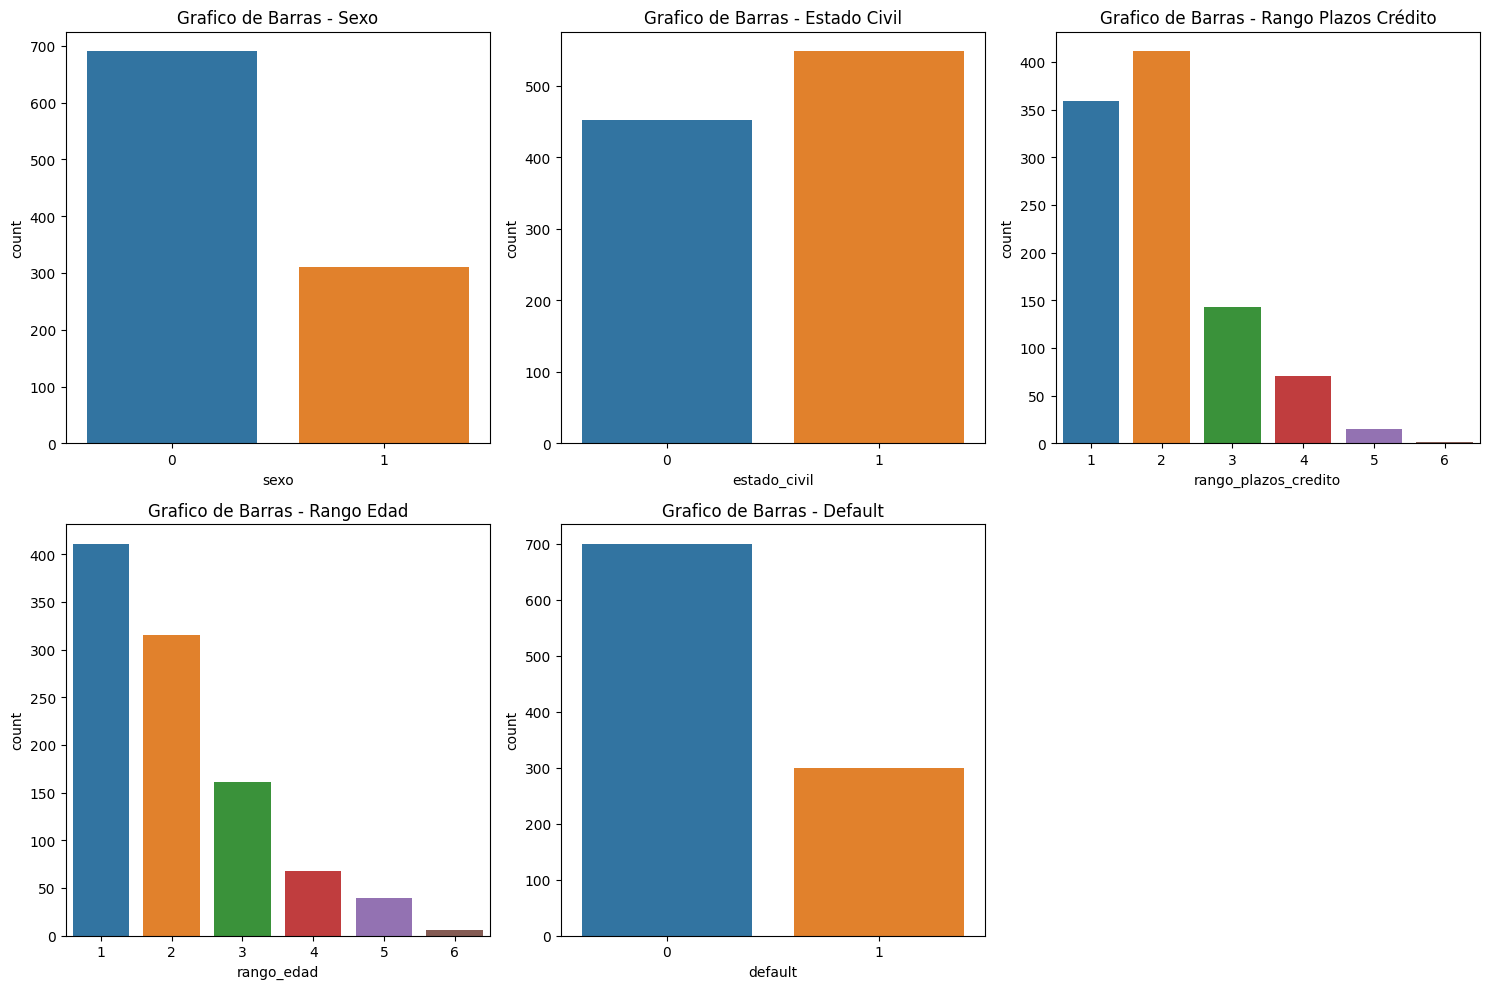

In [10]:
import seaborn as sns

def analisis_exploratorio():
    # variables de ámbito global
    global df_banco, resultados

    # Configurar el diseño de la figura y los ejes
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Generar gráfico de barras para 'sexo' con Seaborn
    sns.countplot(x='sexo', data=df_banco, ax=axes[0, 0])
    axes[0, 0].set_title('Grafico de Barras - Sexo')

    # Generar gráfico de barras para 'estado_civil' con Seaborn
    sns.countplot(x='estado_civil', data=df_banco, ax=axes[0, 1])
    axes[0, 1].set_title('Grafico de Barras - Estado Civil')

    # Generar gráfico de barras para 'rango_plazos_credito' con Seaborn
    sns.countplot(x='rango_plazos_credito', data=df_banco, ax=axes[0, 2])
    axes[0, 2].set_title('Grafico de Barras - Rango Plazos Crédito')

    # Generar gráfico de barras para 'rango_edad' con Seaborn
    sns.countplot(x='rango_edad', data=df_banco, ax=axes[1, 0])
    axes[1, 0].set_title('Grafico de Barras - Rango Edad')

    # Generar gráfico de barras para 'default' con Seaborn
    sns.countplot(x='default', data=df_banco, ax=axes[1, 1])
    axes[1, 1].set_title('Grafico de Barras - Default')

    # Eliminar el último subplot que no se está utilizando
    fig.delaxes(axes[1, 2])

    # Ajustar el diseño
    plt.tight_layout()
    plt.show()

analisis_exploratorio()


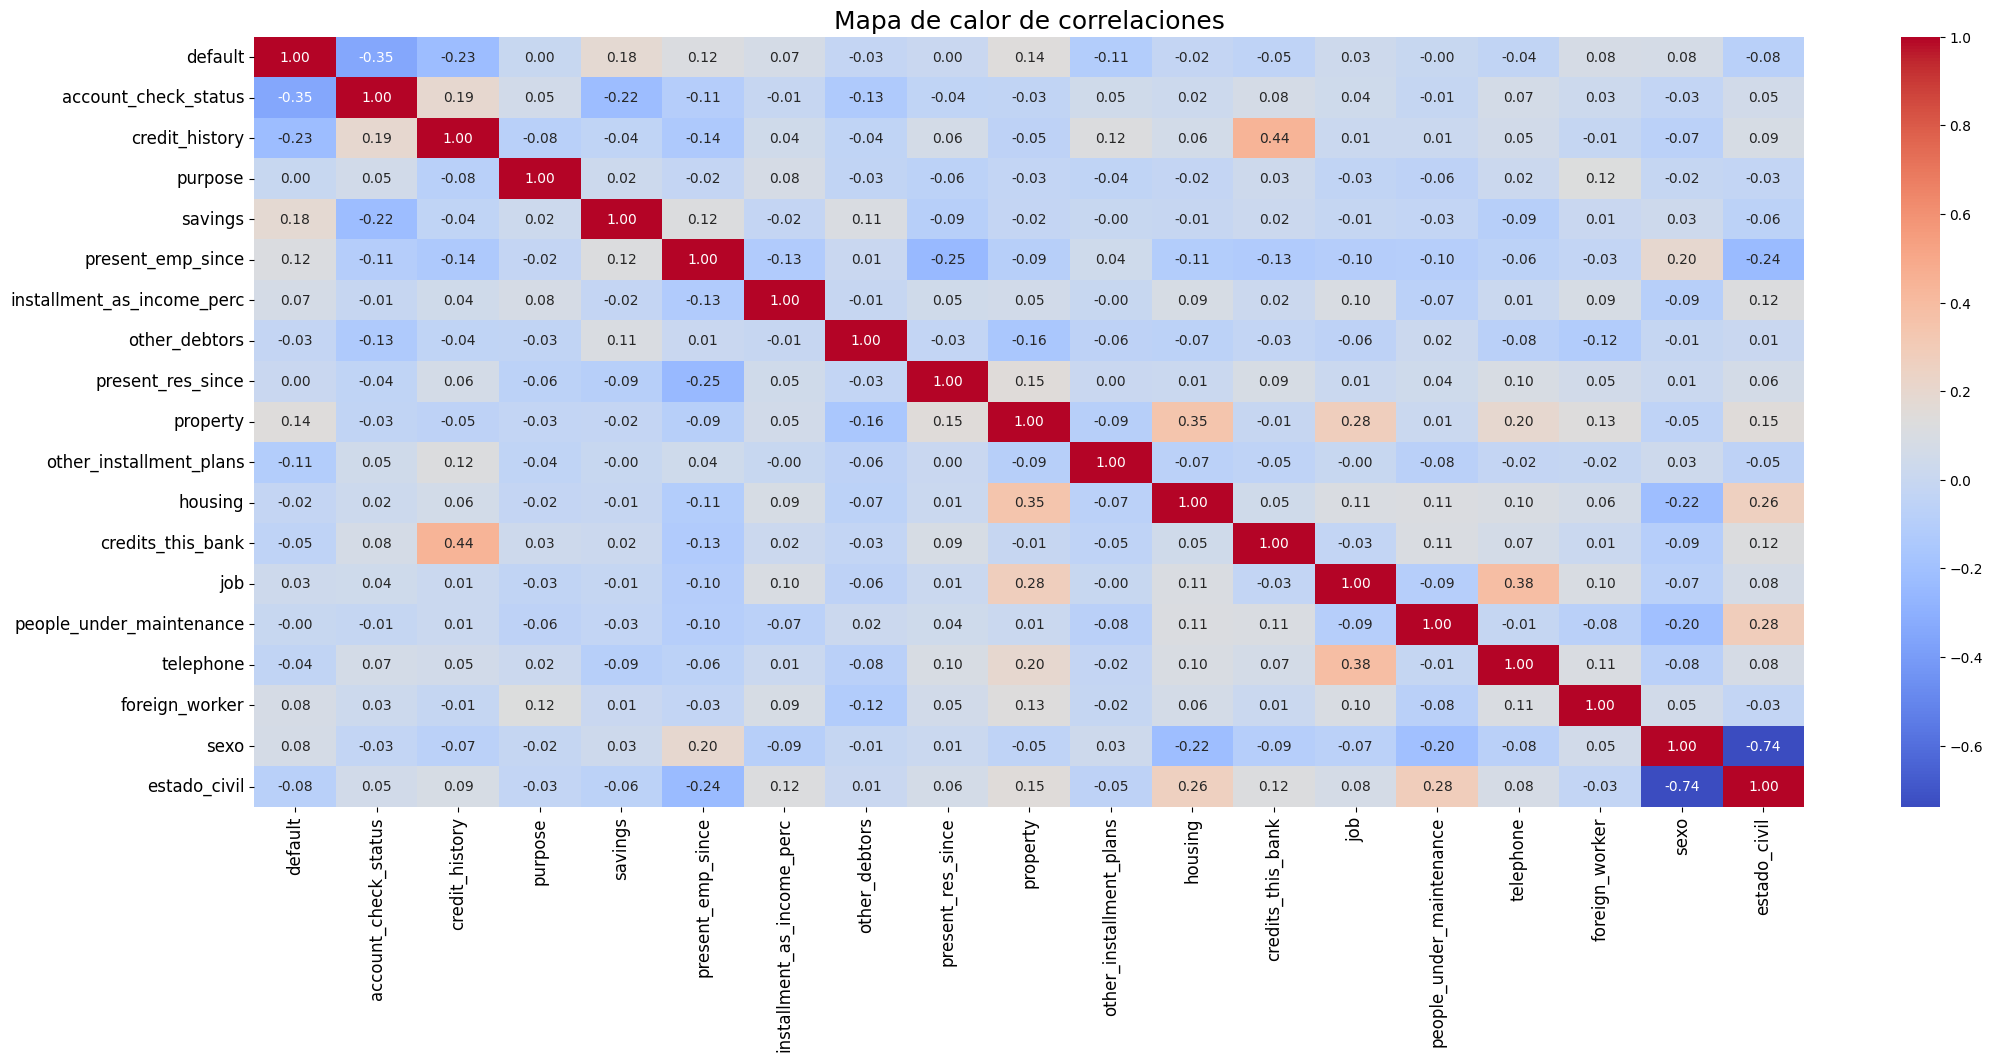

In [11]:
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major',labelsize=12)
plt.title('Mapa de calor de correlaciones', fontsize=18)
plt.show()

In [12]:
print(df_banco.groupby(['estado_civil', 'sexo']).size())

estado_civil  sexo
0             0       142
              1       310
1             0       548
dtype: int64


In [13]:
# Seleccionar las columnas categóricas para aplicar get_dummies
columnas_categoricas = ['people_under_maintenance','credits_this_bank','present_res_since','installment_as_income_perc','account_check_status', 'credit_history', 'purpose', 'savings',
                         'present_emp_since', 'other_debtors', 'property', 'other_installment_plans',
                         'housing', 'job', 'telephone', 'rango_edad', 'rango_plazos_credito', 'rango_valor_credito']

# Aplicar get_dummies a las columnas categóricas
df_banco = pd.get_dummies(df_banco, columns=columnas_categoricas)

# Mostrar el DataFrame con variables codificadas
df_banco.head(5)


,default,foreign_worker,sexo,estado_civil,people_under_maintenance_1,people_under_maintenance_2,credits_this_bank_1,credits_this_bank_2,credits_this_bank_3,credits_this_bank_4,present_res_since_1,present_res_since_2,present_res_since_3,present_res_since_4,installment_as_income_perc_1,installment_as_income_perc_2,installment_as_income_perc_3,installment_as_income_perc_4,account_check_status_1,account_check_status_2,account_check_status_3,account_check_status_4,credit_history_1,credit_history_2,credit_history_3,credit_history_4,credit_history_5,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,savings_1,savings_2,savings_3,savings_4,savings_5,present_emp_since_1,present_emp_since_2,present_emp_since_3,present_emp_since_4,present_emp_since_5,other_debtors_1,other_debtors_2,other_debtors_3,property_1,property_2,property_3,property_4,other_installment_plans_1,other_installment_plans_2,other_installment_plans_3,housing_1,housing_2,housing_3,job_1,job_2,job_3,job_4,telephone_0,telephone_2,rango_edad_1,rango_edad_2,rango_edad_3,rango_edad_4,rango_edad_5,rango_edad_6,rango_plazos_credito_1,rango_plazos_credito_2,rango_plazos_credito_3,rango_plazos_credito_4,rango_plazos_credito_5,rango_plazos_credito_6,rango_valor_credito_1,rango_valor_credito_2,rango_valor_credito_3,rango_valor_credito_4,rango_valor_credito_5,rango_valor_credito_6,rango_valor_credito_7,rango_valor_credito_8,rango_valor_credito_9,rango_valor_credito_10,rango_valor_credito_11,rango_valor_credito_12,rango_valor_credito_13,rango_valor_credito_14,rango_valor_credito_15,rango_valor_credito_16,rango_valor_credito_17,rango_valor_credito_18,rango_valor_credito_19,rango_valor_credito_20
0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_banco.tail(5)

,default,foreign_worker,sexo,estado_civil,people_under_maintenance_1,people_under_maintenance_2,credits_this_bank_1,credits_this_bank_2,credits_this_bank_3,credits_this_bank_4,present_res_since_1,present_res_since_2,present_res_since_3,present_res_since_4,installment_as_income_perc_1,installment_as_income_perc_2,installment_as_income_perc_3,installment_as_income_perc_4,account_check_status_1,account_check_status_2,account_check_status_3,account_check_status_4,credit_history_1,credit_history_2,credit_history_3,credit_history_4,credit_history_5,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,savings_1,savings_2,savings_3,savings_4,savings_5,present_emp_since_1,present_emp_since_2,present_emp_since_3,present_emp_since_4,present_emp_since_5,other_debtors_1,other_debtors_2,other_debtors_3,property_1,property_2,property_3,property_4,other_installment_plans_1,other_installment_plans_2,other_installment_plans_3,housing_1,housing_2,housing_3,job_1,job_2,job_3,job_4,telephone_0,telephone_2,rango_edad_1,rango_edad_2,rango_edad_3,rango_edad_4,rango_edad_5,rango_edad_6,rango_plazos_credito_1,rango_plazos_credito_2,rango_plazos_credito_3,rango_plazos_credito_4,rango_plazos_credito_5,rango_plazos_credito_6,rango_valor_credito_1,rango_valor_credito_2,rango_valor_credito_3,rango_valor_credito_4,rango_valor_credito_5,rango_valor_credito_6,rango_valor_credito_7,rango_valor_credito_8,rango_valor_credito_9,rango_valor_credito_10,rango_valor_credito_11,rango_valor_credito_12,rango_valor_credito_13,rango_valor_credito_14,rango_valor_credito_15,rango_valor_credito_16,rango_valor_credito_17,rango_valor_credito_18,rango_valor_credito_19,rango_valor_credito_20
995,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df_banco.shape

(1000, 98)

In [16]:
df_banco.default.value_counts()

0    700
1    300
Name: default, dtype: int64

In [ ]:

valores_minimos = df_banco.min()
valores_maximos = df_banco.max()

# Configurar pandas para mostrar más filas y columnas si es necesario
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Imprimir los valores mínimos y máximos por columna
print("Valores Mínimos por Columna:")
print(valores_minimos)

print("\nValores Máximos por Columna:")
print(valores_maximos)


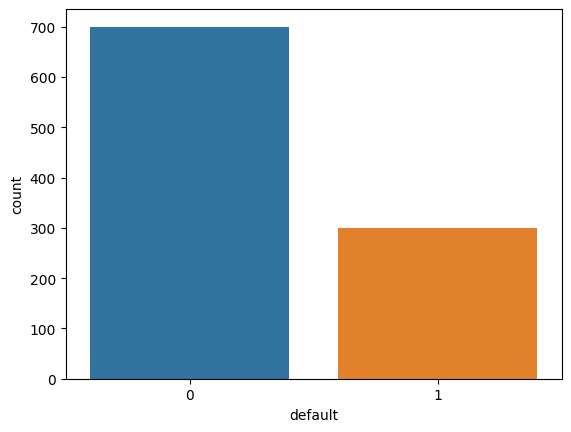

In [18]:
import seaborn as sns
ax=sns.countplot(x='default', data=df_banco)

In [19]:
#biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [20]:
#dividiendo los datos en características y target
X = df_banco.drop('default', axis = 1)
y = df_banco['default']

In [21]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [22]:
#unión de los datos balanceados
df_banco = pd.concat([X, y], axis=1)

In [23]:
#verificación 1 - unión de los datos
df_banco.head(2)

,foreign_worker,sexo,estado_civil,people_under_maintenance_1,people_under_maintenance_2,credits_this_bank_1,credits_this_bank_2,credits_this_bank_3,credits_this_bank_4,present_res_since_1,present_res_since_2,present_res_since_3,present_res_since_4,installment_as_income_perc_1,installment_as_income_perc_2,installment_as_income_perc_3,installment_as_income_perc_4,account_check_status_1,account_check_status_2,account_check_status_3,account_check_status_4,credit_history_1,credit_history_2,credit_history_3,credit_history_4,credit_history_5,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,savings_1,savings_2,savings_3,savings_4,savings_5,present_emp_since_1,present_emp_since_2,present_emp_since_3,present_emp_since_4,present_emp_since_5,other_debtors_1,other_debtors_2,other_debtors_3,property_1,property_2,property_3,property_4,other_installment_plans_1,other_installment_plans_2,other_installment_plans_3,housing_1,housing_2,housing_3,job_1,job_2,job_3,job_4,telephone_0,telephone_2,rango_edad_1,rango_edad_2,rango_edad_3,rango_edad_4,rango_edad_5,rango_edad_6,rango_plazos_credito_1,rango_plazos_credito_2,rango_plazos_credito_3,rango_plazos_credito_4,rango_plazos_credito_5,rango_plazos_credito_6,rango_valor_credito_1,rango_valor_credito_2,rango_valor_credito_3,rango_valor_credito_4,rango_valor_credito_5,rango_valor_credito_6,rango_valor_credito_7,rango_valor_credito_8,rango_valor_credito_9,rango_valor_credito_10,rango_valor_credito_11,rango_valor_credito_12,rango_valor_credito_13,rango_valor_credito_14,rango_valor_credito_15,rango_valor_credito_16,rango_valor_credito_17,rango_valor_credito_18,rango_valor_credito_19,rango_valor_credito_20,default
0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


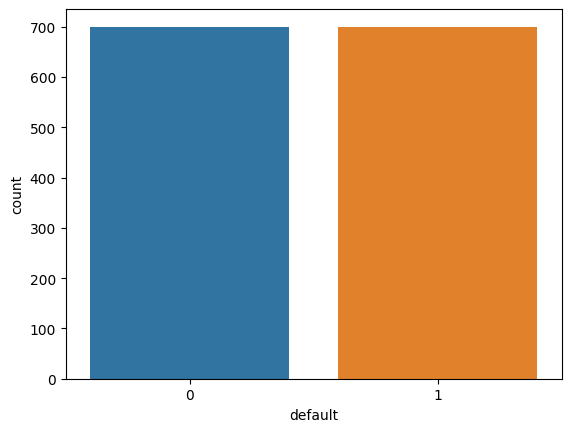

In [24]:
import seaborn as sns
ax=sns.countplot(x='default', data=df_banco)

In [ ]:
#biblioteca para standarizar los datos
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

# Mostrar como un DataFrame
df_normalizado = pd.DataFrame(X_normalizado, columns=X.columns)

# Imprimir los valores mínimo y máximo
print("Valor mínimo después de estandarizar:")
print(df_normalizado.min())
print("\nValor máximo después de estandarizar:")
print(df_normalizado.max())

#**4. Construcción de Modelos**


---


In [26]:
#Tu función crea_modelos() y tu código aqui
def crea_modelos():
    # variables de ámbito global
    global df_banco, resultados

    y = df_banco['default']
    x = df_banco.drop(columns='default')
    train_x, test_x, train_y, test_y = train_test_split(X_normalizado, y, test_size=0.30, random_state = 77)

    regresion_logistica = LogisticRegression()
    regresion_logistica.fit(train_x, train_y)
    predictions = regresion_logistica.predict(test_x)

    accuracy_regresion_logistica = accuracy_score(test_y, predictions)
    precision_regresion_logistica = precision_score(test_y, predictions)


    #biblioteca para crear el modelo de machine learning
    from sklearn.naive_bayes import BernoulliNB

    #escojo utilizar mediana, porque es el valor central de nuestros datos ordenados
    mediana = np.median(train_x)
    mediana

    #Binarizando los recursos usando la mediana
    X_train_binarizado = np.where(train_x > mediana, 1, 0)

    #creamos el modelo
    bnb = BernoulliNB()

    #entrenando el modelo
    bnb.fit(X_train_binarizado, train_y)

    #Binarizando la base de prueba
    X_test_binarizado = np.where(test_x > np.median(test_x), 1, 0)
    X_test_binarizado

    #probando el modelo
    prediccion_BNb = bnb.predict(X_test_binarizado)

    accuracy_naive_bayes = accuracy_score(test_y, prediccion_BNb)
    precision_naive_bayes = precision_score(test_y, prediccion_BNb)


    #biblioteca para crear el modelo de machine learning
    from sklearn.tree import DecisionTreeClassifier

    #iniciando el modelo
    dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

    #entrenando el modelo
    dtc.fit(train_x, train_y)

    #verificando la importancia de cada atributo
    dtc.feature_importances_
    prediccion_ArbolDecision = dtc.predict(test_x)

    #probando el modelo
    accuracy_ArbolDecision = accuracy_score(test_y, prediccion_ArbolDecision)
    precision_ArbolDecision = precision_score(test_y, prediccion_ArbolDecision)


    from sklearn.metrics import recall_score
    #recall modelo regresion logistica
    recall_regresion_logistica = recall_score(test_y, predictions)
    recall_naive_bayes = recall_score(test_y, prediccion_BNb)
    recall_arbol_decision= recall_score(test_y, prediccion_ArbolDecision)


    from sklearn.metrics import f1_score
    #F1_Score = 2 * (precision * recall) / (precision + recall)
    f1_score_regresion_logistica = f1_score(test_y, predictions, average='micro')
    f1_score_naive_bayes = f1_score(test_y, prediccion_BNb, average='micro')
    f1_score_ArbolDecision = f1_score(test_y, prediccion_ArbolDecision, average='micro')


    from sklearn.metrics import roc_auc_score
    #AUC_ROC = \int_{0}^{1} TPR(t) \cdot FPR(t) \,dt
    auc_roc_regresion_logistica = roc_auc_score(test_y, predictions, average='micro')
    auc_roc_naive_bayes =roc_auc_score(test_y, prediccion_BNb, average='micro')
    auc_roc_ArbolDecision = roc_auc_score(test_y, prediccion_ArbolDecision, average='micro')

    accuracy = []
    accuracy.append(accuracy_regresion_logistica)
    accuracy.append(accuracy_naive_bayes)
    accuracy.append(accuracy_ArbolDecision)

    nombre_modelo = []
    nombre_modelo.append(regresion_logistica)
    nombre_modelo.append(bnb)
    nombre_modelo.append(dtc)

    #solo los valores igual a uno de lamatriz de confusion
    precision = []
    precision.append(precision_regresion_logistica)
    precision.append(precision_naive_bayes)
    precision.append(precision_ArbolDecision)

    recall = []
    recall.append(recall_regresion_logistica)
    recall.append(recall_naive_bayes)
    recall.append(recall_arbol_decision)

    f1_score = []
    f1_score.append(f1_score_regresion_logistica)
    f1_score.append(f1_score_naive_bayes)
    f1_score.append(f1_score_ArbolDecision)

    auc_roc = []
    auc_roc.append(auc_roc_regresion_logistica)
    auc_roc.append(auc_roc_naive_bayes)
    auc_roc.append(auc_roc_ArbolDecision)

    resultados = {
      'Nombre_Modelo': nombre_modelo,
      'Accuracy': accuracy,
      'Precision': accuracy,
      'Recall': recall,
      'F1_Score': f1_score,
      'AUC_ROC': auc_roc
    }


    #matriz de confusion
    from sklearn.metrics import confusion_matrix
    print("Matriz de confusion de la regresion logisitca\n",confusion_matrix(test_y , predictions))
    print("Matriz de confusion de Naive Bayes\n",confusion_matrix(test_y , prediccion_BNb))
    print("Matriz de confusion del arbol de decision\n",confusion_matrix(test_y , prediccion_ArbolDecision))

In [27]:
crea_modelos()
for i, model in enumerate(resultados['Nombre_Modelo']):
    print(f"Modelo: {model}")
    print(f"Accuracy: {resultados['Accuracy'][i]}")
    print(f"Precisión: {resultados['Precision'][i]}")
    print(f"Recall: {resultados['Recall'][i]}")
    print(f"F1-score: {resultados['F1_Score'][i]}")
    print(f"AUC-ROC: {resultados['AUC_ROC'][i]}\n")
    print("-------")

Matriz de confusion de la regresion logisitca
 [[190  32]
 [ 39 159]]
Matriz de confusion de Naive Bayes
 [[168  54]
 [ 30 168]]
Matriz de confusion del arbol de decision
 [[162  60]
 [ 36 162]]
Modelo: LogisticRegression()
Accuracy: 0.830952380952381
Precisión: 0.830952380952381
Recall: 0.803030303030303
F1-score: 0.830952380952381
AUC-ROC: 0.8294430794430795

-------
Modelo: BernoulliNB()
Accuracy: 0.8
Precisión: 0.8
Recall: 0.8484848484848485
F1-score: 0.8000000000000002
AUC-ROC: 0.8026208026208027

-------
Modelo: DecisionTreeClassifier(criterion='entropy', random_state=42)
Accuracy: 0.7714285714285715
Precisión: 0.7714285714285715
Recall: 0.8181818181818182
F1-score: 0.7714285714285715
AUC-ROC: 0.773955773955774

-------


#**5. Evaluación y Selección del Modelo**


---


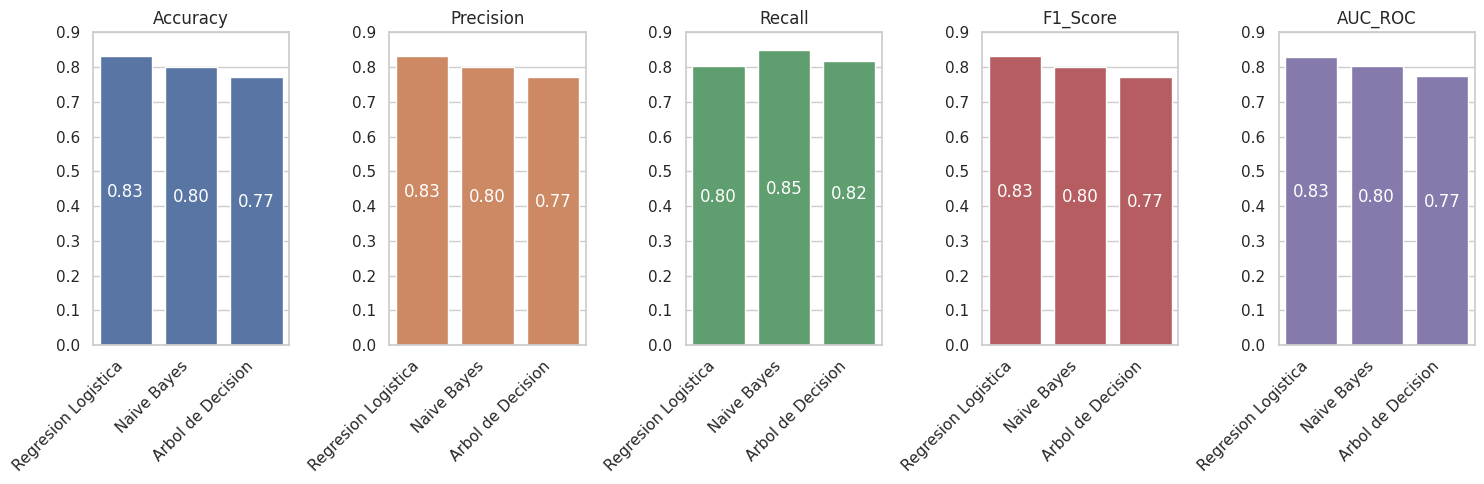

In [28]:
def visualiza_resultados(resultados):
    modelos = ['Regresion Logistica', 'Naive Bayes', 'Arbol de Decision']

    # Set the style for the plots
    sns.set(style="whitegrid")

    # Calcular el número de métricas
    num_metricas = len(resultados.keys()) - 1  # Restamos 1 para no contar 'Nombre_Modelo'

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_metricas, figsize=(15, 5))  # Ajustar el número de columnas

    # Plot para cada métrica
    for i, (metrica, color) in enumerate(zip(['Accuracy', 'Precision', 'Recall', 'F1_Score', 'AUC_ROC'], sns.color_palette())):
        ax = sns.barplot(x=modelos, y=resultados[metrica], ax=axes[i], color=color)
        axes[i].set_title(f'{metrica}')

        # Rotar el texto en el eje x a 45 grados
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Agregar el valor en el centro de cada barra en color blanco
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='bottom' if p.get_height() > 0 else 'top', color='white', fontsize=12)
        # Ajustar la escala vertical a 0.0 - 0.90
        ax.set_ylim(0.0, 0.90)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

visualiza_resultados(resultados)
